In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import datetime
import glob

import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

DOWNLOAD_DIR = './data/'

In [8]:
def read_single_csv_entso_e(file):
    print(f'Loading {file}')
    return pd.read_csv(file, sep = '\t', encoding = 'utf-16') 
    

def load_complete_entso_e_data(directory):
    
    pattern = f'{directory}*.csv'
    files = glob.glob(pattern)
    
    each_csv_file = [read_single_csv_entso_e(file) for file in files]
    data   = pd.concat(each_csv_file, ignore_index=True)

    data["DateTime"] = pd.to_datetime(data["DateTime"]) 
    
    data = data.sort_values(by = ["AreaName", "DateTime"])
    
    return data

power_demand = load_complete_entso_e_data(DOWNLOAD_DIR)

Loading ./data\2014_12_ActualTotalLoad.csv
Loading ./data\2015_10_ActualTotalLoad.csv
Loading ./data\2015_11_ActualTotalLoad.csv
Loading ./data\2015_12_ActualTotalLoad.csv
Loading ./data\2015_2_ActualTotalLoad.csv
Loading ./data\2015_3_ActualTotalLoad.csv
Loading ./data\2015_1_ActualTotalLoad.csv
Loading ./data\2015_4_ActualTotalLoad.csv
Loading ./data\2015_5_ActualTotalLoad.csv
Loading ./data\2015_6_ActualTotalLoad.csv
Loading ./data\2015_7_ActualTotalLoad.csv
Loading ./data\2020_5_ActualTotalLoad.csv
Loading ./data\2015_8_ActualTotalLoad.csv
Loading ./data\2015_9_ActualTotalLoad.csv
Loading ./data\2016_1_ActualTotalLoad.csv
Loading ./data\2016_2_ActualTotalLoad.csv
Loading ./data\2016_3_ActualTotalLoad.csv
Loading ./data\2016_4_ActualTotalLoad.csv
Loading ./data\2016_5_ActualTotalLoad.csv
Loading ./data\2016_6_ActualTotalLoad.csv
Loading ./data\2016_7_ActualTotalLoad.csv
Loading ./data\2016_8_ActualTotalLoad.csv
Loading ./data\2016_9_ActualTotalLoad.csv
Loading ./data\2016_10_ActualT

What is in there?

In [9]:
power_demand

,Year,Month,Day,DateTime,ResolutionCode,areacode,AreaTypeCode,AreaName,MapCode,TotalLoadValue,UpdateTime
36548,2014,12,31,2014-12-31 23:00:00,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7412.14,2017-09-14 04:16:36
36764,2014,12,31,2014-12-31 23:15:00,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7305.11,2017-09-14 04:16:36
36469,2014,12,31,2014-12-31 23:30:00,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7263.03,2017-09-14 04:16:36
36570,2014,12,31,2014-12-31 23:45:00,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,7103.58,2017-09-14 04:16:36
690579,2015,1,1,2015-01-01 00:00:00,PT15M,10YDE-VE-------2,CTA,50Hertz CA,DE_50HzT,6958.62,2017-09-14 04:00:17
...,...,...,...,...,...,...,...,...,...,...,...
1376657,2020,5,6,2020-05-06 12:00:00,PT60M,10YCH-SWISSGRIDZ,CTA,swissgrid CA,CH,6978.58,2020-05-06 22:46:19
1376693,2020,5,6,2020-05-06 13:00:00,PT60M,10YCH-SWISSGRIDZ,CTA,swissgrid CA,CH,6460.15,2020-05-06 23:31:16
1376366,2020,5,6,2020-05-06 14:00:00,PT60M,10YCH-SWISSGRIDZ,CTA,swissgrid CA,CH,6856.83,2020-05-07 00:31:05
1377088,2020,5,6,2020-05-06 15:00:00,PT60M,10YCH-SWISSGRIDZ,CTA,swissgrid CA,CH,6639.24,2020-05-07 01:46:05


Hm... that's a lot of information. Let's reduce it...

In [10]:
power_demand.columns

Index(['Year', 'Month', 'Day', 'DateTime', 'ResolutionCode', 'areacode',
       'AreaTypeCode', 'AreaName', 'MapCode', 'TotalLoadValue', 'UpdateTime'],
      dtype='object')

Which countries and regions are there?

In [11]:
power_demand["AreaName"].unique()

array(['50Hertz CA', 'APG BZ', 'APG CA', 'AST BZ', 'AST CA', 'Albania',
       'Amprion CA', 'Austria', 'Belgium', 'Bosnia Herzegovina',
       'Bulgaria', 'CEPS BZ', 'CEPS CA', 'CGES BZ', 'CGES CA', 'CREOS CA',
       'Croatia', 'Cyprus', 'Cyprus TSO BZ', 'Cyprus TSO CA',
       'Czech Republic', 'DE-AT-LU BZ', 'DE-LU BZ', 'DK1  BZ', 'DK2 BZ',
       'Denmark', 'ELES BZ', 'ELES CA', 'EMS BZ', 'EMS CA', 'ESO BZ',
       'ESO CA', 'EirGrid CA', 'Elering BZ', 'Elering CA', 'Elia BZ',
       'Elia CA', 'Energinet CA', 'Estonia', 'Fingrid BZ', 'Fingrid CA',
       'Finland', 'France', 'Germany', 'Greece', 'HOPS BZ', 'HOPS CA',
       'Hungary', 'IPTO BZ', 'IPTO CA', 'IT-Centre-North BZ',
       'IT-Centre-South BZ', 'IT-North BZ', 'IT-Sardinia BZ',
       'IT-Sicily BZ', 'IT-South BZ', 'Ireland', 'Ireland - (SEM) BZ',
       'Italy', 'Italy CA', 'Latvia', 'Litgrid BZ', 'Litgrid CA',
       'Lithuania', 'Luxembourg', 'MAVIR BZ', 'MAVIR CA', 'MD BZ',
       'MD CA', 'MEPSO BZ', 'MEPSO CA', '

puh... a lot! Is Austria there?

In [12]:
"Austria" in power_demand["AreaName"].values

True

Let's get Austrian data then and...

In [21]:
def get_country_data(data, country):
    return data[data["AreaName"] == country]

power_demand_at_mwh = get_country_data(power_demand, "Austria")

## Exercise 1

Let's do sum summary statistics. Calculate mean, standard deviation, min, max and the 25%, 50% and 75% quantile of the distribution. Hint: There may be a pandas function that does it for you...

In a second step, do the same for Germany. Does the *10 rule hold? (everything in Germany is ten times as big as in Austria)

Now let's plot Austrian data.

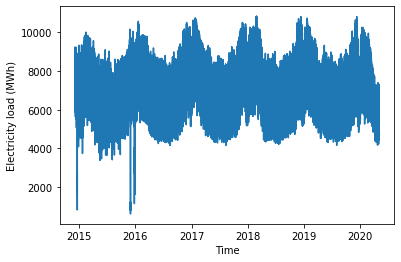

In [50]:
def plot_data(data, ylabel, xlabel = "Time"):
    
    plt.plot(data["DateTime"], data["TotalLoadValue"])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
plot_data(power_demand_at_mwh, "Electricity load (MWh)")

Hm... there may be outliers. But how complete is Austrian data?

In [16]:
def check_data_completeness(data):
    nmb_nas = np.sum(pd.isna(data["TotalLoadValue"]))
    nmb_0 = np.sum(data["TotalLoadValue"] == 0) 
    
    print(f'The data contains {nmb_nas} NAs and {nmb_0} zeros')
    
check_data_completeness(power_demand_at_mwh)

The data contains 0 NAs and 0 zeros


How complete is e.g. North Macedonian data in comparison?

In [17]:
power_demand_nm_mwh = get_country_data(power_demand, "North Macedonia")
check_data_completeness(power_demand_nm_mwh)

The data contains 0 NAs and 648 zeros


## Exercise 2

What is the time resolution of the dataset? There are several ways of finding it, try to find at least two.

Let's aggregate the data to hourly data. 

In [89]:
def aggregate_data_hourly(data):
    
    times = pd.DatetimeIndex(data["DateTime"])
    data_hourly = data.groupby([times.year, times.month, times.day, times.hour])
    data_hourly_agg = data_hourly.agg({"DateTime":"min",
                     "TotalLoadValue":"mean"}
                    )
    
    return data_hourly_agg

power_demand_at_hourly_mwh = aggregate_data_hourly(power_demand_at_mwh)

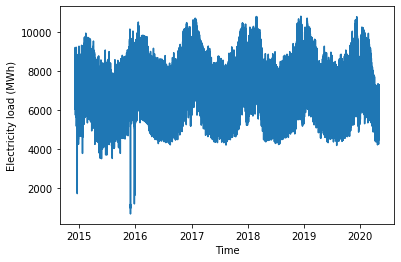

In [90]:
plot_data(power_demand_at_hourly_mwh, "Electricity load (MWh)")

Let's look into the data more closely and find some regularities...

In [34]:
def aggregate_data_yearly(data):
    
    times = pd.DatetimeIndex(data["DateTime"])
    data_yearly = data.groupby([times.year])
    data_yearly_agg = data_yearly.agg(
                    {"DateTime":"min",
                     "TotalLoadValue":"sum"}
                    )
    
    return data_yearly_agg

power_demand_at_yearly_mwh = aggregate_data_yearly(power_demand_at_hourly_mwh)

In [35]:
power_demand_at_yearly_mwh

,DateTime,TotalLoadValue
DateTime,,
2014,2014-12-01 23:00:00,4927758.7
2015,2015-01-01 00:00:00,59156452.0
2016,2016-01-01 00:00:00,62776939.7
2017,2017-01-01 00:00:00,63554438.9
2018,2018-01-01 00:00:00,63648345.1
2019,2019-01-01 00:00:00,63085228.5
2020,2020-01-01 00:00:00,21857894.6


That's really large, inconvinent numbers. The data is in MWh, let's convert it to TWh.

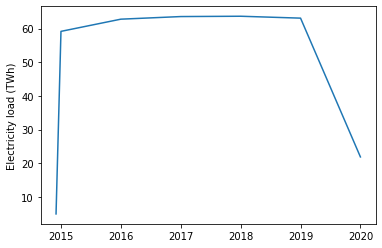

In [36]:
# let's convert the data to twh
power_demand_at_yearly_twh = power_demand_at_yearly_mwh
power_demand_at_yearly_twh["TotalLoadValue"] = power_demand_at_yearly_mwh["TotalLoadValue"] / 10**6 


plot_data(power_demand_at_yearly_twh, "Electricity load (TWh)")

Hm... 2014 and 2020 are really low, as they are incomplete. We should select the correct period therefore...

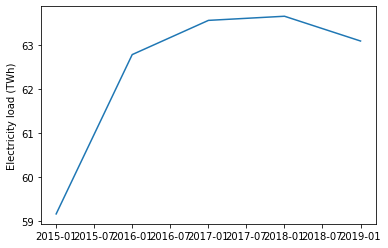

In [38]:
def select_period(data, start_year, start_month, start_day, end_year, end_month, end_day):
    lim_low = datetime.datetime(start_year, start_month, start_day)
    lim_up = datetime.datetime(end_year, end_month, end_day)
    
    data = data[(data["DateTime"] >= lim_low) & (data["DateTime"] <= lim_up)]
    
    return data

power_demand_at_yearly_full_years_twh = select_period(power_demand_at_yearly_twh, 2015, 1, 1, 2019, 12, 31)
plot_data(power_demand_at_yearly_full_years_twh, "Electricity load (TWh)")

Hm... hard to tell if there is a trend. Time-series too short. Let's neglect it for the moment.

In [41]:
def aggregate_data_monthly(data):
    
    times = pd.DatetimeIndex(data["DateTime"])
    data_monthly = data.groupby([times.year, times.month])
    data_monthly_agg = data_monthly.agg({"DateTime":"min",
                     "TotalLoadValue":"sum"}
                    )
    
    return data_monthly_agg

power_demand_at_monthly_mwh = aggregate_data_monthly(power_demand_at_mwh)

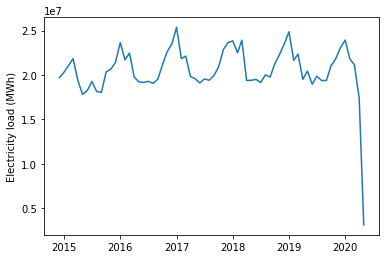

In [42]:
plot_data(power_demand_at_monthly_mwh, "Electricity load (MWh)")

hm... seems to be seasonal, right? But let's also select the correct period to show full years only.

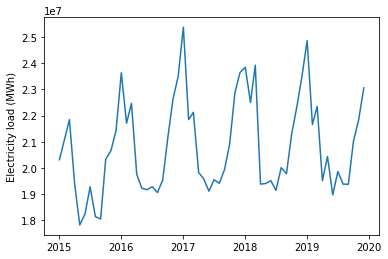

In [44]:
power_demand_at_monthly_full_years_mwh = select_period(power_demand_at_monthly_mwh, 2015, 1, 1, 2019, 12, 31)
plot_data(power_demand_at_monthly_full_years_mwh, "Electricity load (MWh)")

To understand it better, we could simply take the monthly average...

In [45]:
def aggregate_data_monthly_mean(data):
        
    times = pd.DatetimeIndex(data["DateTime"])
    data_monthly = data.groupby([times.month])
    data_monthly_agg = data_monthly.agg({"DateTime":"min",
                     "TotalLoadValue":"mean"}
                    )
    
    data_monthly_agg["DateTime"] = data_monthly_agg.index
    
    return data_monthly_agg

power_demand_at_monthly_mean_mwh = aggregate_data_monthly_mean(power_demand_at_monthly_full_years_mwh)

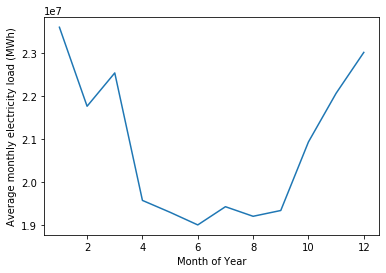

In [51]:
plot_data(power_demand_at_monthly_mean_mwh, "Average monthly electricity load (MWh)", "Month of Year")

Hm... power demand seems to be seasonal.


## Exercise 3

There are at least two other time scales over which data shows seasonality. Can you find them and plot them? Hint: df.DateTime.dt.weekday may be very useful here.

Let's use all of what we learnt to predict demand! For the moment, we just use linear regression.

Our predicted value Y is the hourly demand.

In [63]:
# Our predicted variable Y is the hourly load

power_demand_at_hourly_reduced_mwh =  select_period(power_demand_at_hourly_mwh, 2015, 1, 1, 2019, 12, 31)

Y = np.array(power_demand_at_hourly_reduced_mwh["TotalLoadValue"]).reshape(-1, 1)

In [64]:
Y

array([[5963.5],
       [5726. ],
       [5346.8],
       ...,
       [6348.4],
       [6020.7],
       [5725.2]])

Our predictor variables (or features) are simply months, weekdays, and hours. 

#### Exercise 4

How can this be modelled? Who knows what a dummy is? How are they correctly used?

In [67]:
monthly_dummies = np.array(pd.get_dummies(power_demand_at_hourly_reduced_mwh.DateTime.dt.month))[:, :11]
weekday = np.array(pd.get_dummies(power_demand_at_hourly_reduced_mwh.DateTime.dt.weekday))[:, :6]
hour = np.array(pd.get_dummies(power_demand_at_hourly_reduced_mwh.DateTime.dt.hour))[:, :23]

In [68]:
monthly_dummies

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Joining them all together.

In [69]:
X = np.append(monthly_dummies, weekday, axis = 1)
X = np.append(X, hour, axis = 1)

In [70]:
X.shape

(43801, 40)

Let's put this into a linear model.

In [71]:
#regr = linear_model.LinearRegression(fit_intercept = False)
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, Y)

# The coefficients
print('Coefficients: \n', regr.coef_)


Coefficients: 
 [[  170.53653948   278.9677449   -186.83301692  -952.89495017
  -1285.67379113 -1161.29912492 -1223.56589512 -1319.8380254
  -1034.28767048  -727.67448389  -103.9600221   1420.77383107
   1564.94913696  1620.38435994  1547.87649925  1387.19854353
    466.50811608  -174.52534188  -305.76783562  -310.63528767
     -3.95989041   675.97024658  1436.40887671  1966.8009863
   2158.65989041  2264.20471233  2346.57808219  2218.11523288
   2060.67687671  1939.6530411   1861.43468493  1840.11884932
   1952.00383562  2114.83024658  2035.16553425  1739.64372603
   1324.85435616   983.9390137    659.33994521   298.82060274]]


What does the intercept of the regression tell us?

In [72]:
regr.intercept_

array([5320.22513637])

Let's predict with the model on the training data...

In [73]:
pred = regr.predict(X)

How does it look like?

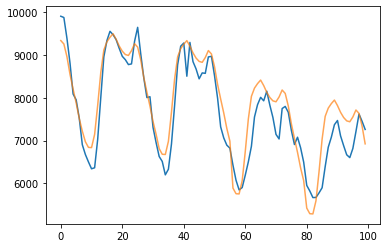

In [74]:
plt.plot(Y[1000:1100, :])
plt.plot(pred[1000:1100, :], alpha = 0.7)

Pretty cool for such a simple model. How does it look over the whole range?

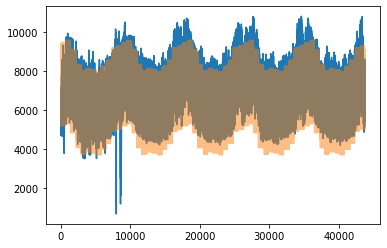

In [75]:
plt.plot(Y)
plt.plot(pred, alpha = 0.5)

And R^2?

In [76]:
r2_score(Y, pred)

0.784721812159068

Wowh. This is pretty high for such a simple model. It means we have rather regular data.

## Exercise 5

Before you do the exercise, let's vote. What expectation do you have when comparing the mean of Y and of pred?

Now, calculate the mean of the two values.

## Exercise 6

Now let's work on the results of the regression. What do coefficients tell us? 

Now plot the dummies for months, weekdays and hours seperately.


In [ ]:
coefs = np.array(regr.coef_).T

#months

In [ ]:
#weekdays

In [ ]:
#hours

## Exercise 7

How do residuals look like now, i.e. the difference between actual value and prediction? 

Plot the residuals.